In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid as cumtrapz

### Script that detects how many samples there are for the said experiment thanks to the trigger on Z sensor, and separate all samples into individual .csv's

In [ ]:
data = pd.read_csv('observed_data_x_y_z_15_09.csv')

# Extract columns
time = data['Time'].values
x = data['x'].values  # Speed
y = data['y'].values  # Side distance
z = data['z'].values  # Top distance

# Step 1: Detect printing cycles using the z (TopDistSensor) trigger
trig_mask = z < 1.3
diff_loc = np.diff(trig_mask.astype(int))  # Find rising and falling edges
start_idx = np.where(diff_loc == 1)[0] + 1  # +1 to correct for diff offset
stop_idx = np.where(diff_loc == -1)[0] + 1

# Ensure start and stop indices are paired correctly
N_sample = min(len(start_idx), len(stop_idx))

# Step 2: Segment the data and save each experiment to a CSV file
for i in range(N_sample):
    idx = range(start_idx[i], stop_idx[i] + 1)
    experiment_data = data.iloc[idx]

    # Save to CSV (time is NOT reset to 0)
    experiment_data.to_csv(f'experiment_{i+1}.csv', index=False)

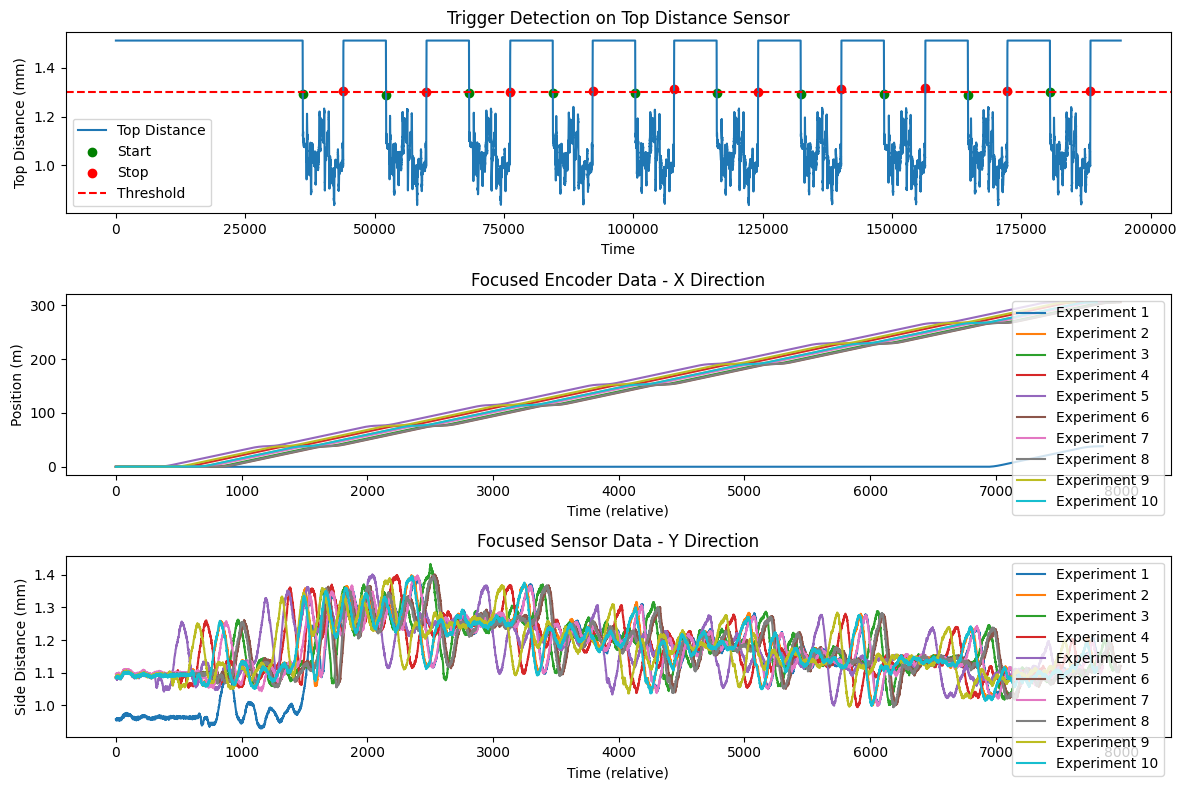

Detected and saved 10 experiments as experiment_1.csv, experiment_2.csv, etc.


In [10]:
# Step 3: Plot the results
plt.figure(figsize=(12, 8))

# Plot z (TopDistSensor) with triggers
plt.subplot(3, 1, 1)
plt.plot(time, z, label='Top Distance')
plt.scatter(time[start_idx], z[start_idx], color='green', label='Start')
plt.scatter(time[stop_idx], z[stop_idx], color='red', label='Stop')
plt.axhline(y=1.3, color='r', linestyle='--', label='Threshold')
plt.xlabel('Time')
plt.ylabel('Top Distance (mm)')
plt.title('Trigger Detection on Top Distance Sensor')
plt.legend()

# Plot integrated speed (position) for each experiment
plt.subplot(3, 1, 2)
for i in range(N_sample):
    idx = range(start_idx[i], stop_idx[i] + 1)
    time_exp = time[idx] - time[idx][0]  # Time relative to start of experiment
    x_exp = x[idx]
    # Integrate speed to get X position
    X_position = cumtrapz(x_exp, time_exp, initial=0)
    plt.plot(time_exp, X_position, label=f'Experiment {i+1}')
plt.xlabel('Time (relative)')
plt.ylabel('Position (m)')
plt.title('Focused Encoder Data - X Direction')
plt.legend()

# Plot segmented y (SideDistSensor) for each experiment
plt.subplot(3, 1, 3)
for i in range(N_sample):
    idx = range(start_idx[i], stop_idx[i] + 1)
    time_exp = time[idx] - time[idx][0]  # Time relative to start of experiment
    plt.plot(time_exp, y[idx], label=f'Experiment {i+1}')
plt.xlabel('Time (relative)')
plt.ylabel('Side Distance (mm)')
plt.title('Focused Sensor Data - Y Direction')
plt.legend()

plt.tight_layout()
plt.show()

# Print the number of experiments detected and saved
print(f"Detected and saved {N_sample} experiments as experiment_1.csv, experiment_2.csv, etc.")

### Visualization of 1 sample

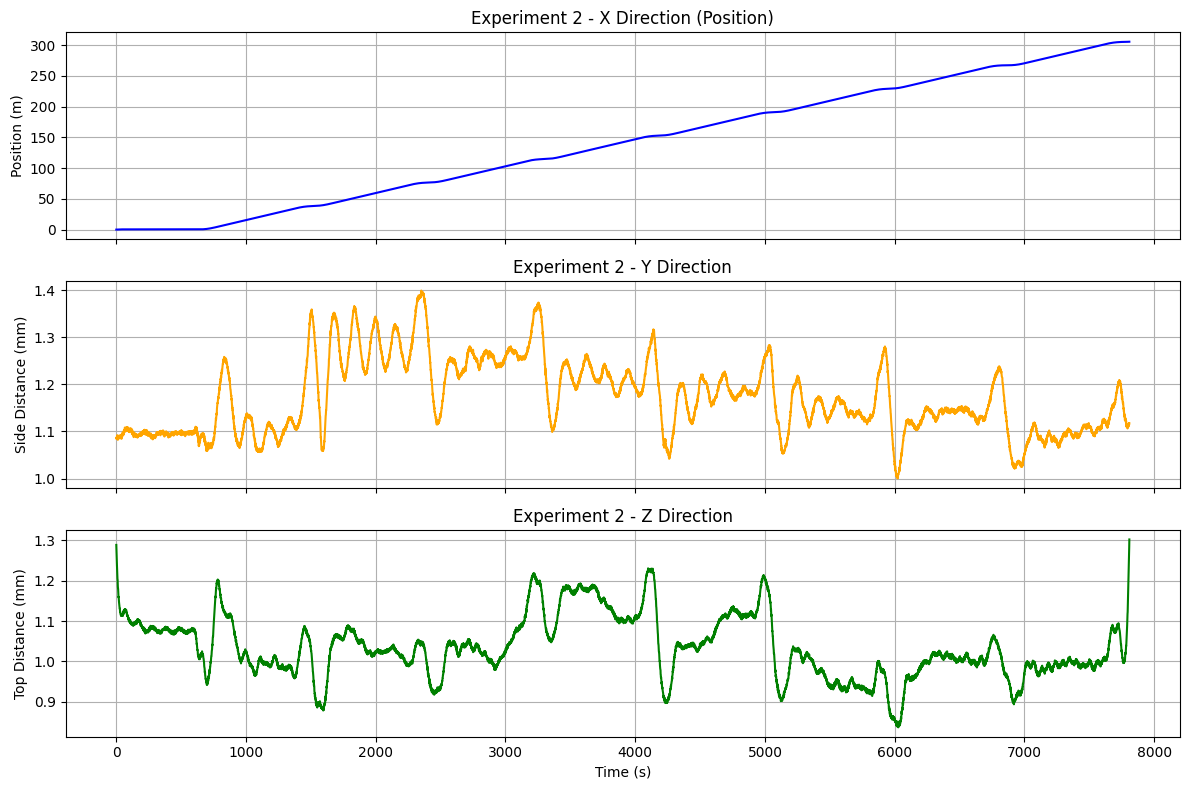

In [17]:
# Load the data for Experiment 2
experiment_2 = pd.read_csv('experiment_2.csv')

# Extract columns
time = experiment_2['Time'].values
x = experiment_2['x'].values  # Speed
y = experiment_2['y'].values  # Side distance
z = experiment_2['z'].values  # Top distance

# Reset time to start at 0 for this experiment
time = time - time[0]

# Integrate speed to get X position
X_position = cumtrapz(x, time, initial=0)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot X position
axes[0].plot(time, X_position, color='blue')
axes[0].set_ylabel('Position (m)')
axes[0].set_title('Experiment 2 - X Direction (Position)')
axes[0].grid(True)

# Plot Y distance
axes[1].plot(time, y, color='orange')
axes[1].set_ylabel('Side Distance (mm)')
axes[1].set_title('Experiment 2 - Y Direction')
axes[1].grid(True)

# Plot Z distance
axes[2].plot(time, z, color='green')
axes[2].set_ylabel('Top Distance (mm)')
axes[2].set_title('Experiment 2 - Z Direction')
axes[2].set_xlabel('Time (s)')
axes[2].grid(True)

plt.tight_layout()
plt.show()
